In [1]:
from __future__ import print_function
import os
import numpy as np
from numpy import newaxis
from sklearn import preprocessing
np.random.seed(1337)

import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Input, Flatten
from keras.layers import Dropout
from keras.models import Model,Sequential
import sys

import pandas as pd
import random

Using TensorFlow backend.


# Reading in data

In [2]:
print("Data read started...")
data = pd.read_csv("result1.csv")
data = data.as_matrix()
print ("Data read finished.")

print(data.shape)

touch_only = 'false'
touch_heart = 'false'

data = np.delete(data, 13, 1)    
data = np.delete(data, 12, 1)    
data = np.delete(data, 11, 1)    
data = np.delete(data, 10, 1)   
data = np.delete(data, 4, 1)    
data = np.delete(data, 3, 1)     
data = np.delete(data, 2, 1)     
data = np.delete(data, 1, 1)   
data.shape

if(touch_only == 'true'):
    data = np.delete(data, 7, 1)    
    data = np.delete(data, 3, 1)   
    data = np.delete(data, 2, 1)   

if(touch_heart == 'true'):
    data = np.delete(data, 7, 1)    
    
data.shape

Data read started...
Data read finished.
(286, 15)


(286, 7)

# Dictionary for the levels

In [3]:
level=["NbackSym1","NbackSym2","NbackSym3"]
level2int = dict((p, i) for i, p in enumerate(level))
int2level = dict((i, p) for i, p in enumerate(level))

# Z normalize

In [4]:
for i in range (1,data.shape[1]):
    data[:, i] = preprocessing.scale(data[:, i])

for i in range(len(data)):
    data[i, 0] = level2int[data[i, 0]]

x_data = data[:, 1:]
y_data = data[:, 0]

/home/amoro/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/amoro/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/amoro/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/amoro/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/amoro/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConve

# One-hot encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_one_hot = ohe.fit_transform(y_data.reshape(-1,1)).toarray()

# Shuffle data

In [6]:
indices = np.arange(x_data.shape[0])
np.random.shuffle(indices)

x_data = x_data[indices]
y_one_hot = y_one_hot[indices]

# Divide into train, validation and test data

In [7]:
len_data = len(x_data)

nb_test = int(len_data*0.15)
nb_validation = int(len_data*0.15)
nb_train = int(len_data*0.7)

end_valid = nb_train+nb_validation

x_train = x_data[0:nb_train]
y_train = y_one_hot[0:nb_train]

x_valid = x_data[nb_train:end_valid]
y_valid = y_one_hot[nb_train:end_valid]

x_test = x_data[end_valid:]
y_test = y_one_hot[end_valid:]

print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)

(200, 6) (200, 3) (42, 6) (42, 3) (44, 6) (44, 3)


# Build the net

In [8]:
model = Sequential()

model.add(Dense(200, input_shape=(x_train.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [9]:
batch_size = 50
epochs = 200
earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train, y_train, nb_epoch=epochs,batch_size=batch_size, 
          callbacks=[earlyStopping], shuffle=True, validation_data = (x_valid, y_valid))

Train on 200 samples, validate on 42 samples
Epoch 1/200
200/200 [==============================] - 0s - loss: 1.0416 - acc: 0.4750 - val_loss: 0.8971 - val_acc: 0.6667
Epoch 2/200
200/200 [==============================] - 0s - loss: 0.7987 - acc: 0.7350 - val_loss: 0.7188 - val_acc: 0.6905
Epoch 3/200
200/200 [==============================] - 0s - loss: 0.5812 - acc: 0.8150 - val_loss: 0.6222 - val_acc: 0.7143
Epoch 4/200
200/200 [==============================] - 0s - loss: 0.4799 - acc: 0.8050 - val_loss: 0.5640 - val_acc: 0.8333
Epoch 5/200
200/200 [==============================] - 0s - loss: 0.4065 - acc: 0.8900 - val_loss: 0.5106 - val_acc: 0.8095
Epoch 6/200
200/200 [==============================] - 0s - loss: 0.3163 - acc: 0.8800 - val_loss: 0.4626 - val_acc: 0.7857
Epoch 7/200
200/200 [==============================] - 0s - loss: 0.2624 - acc: 0.8950 - val_loss: 0.4076 - val_acc: 0.8810
Epoch 8/200
200/200 [==============================] - 0s - loss: 0.2853 - acc: 0.8950 

In [10]:
model.evaluate(x_test, y_test, batch_size=batch_size)

44/44 [==============================] - 0s


[0.00012225126556586474, 1.0]

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict_classes(x_test)
print(y_pred)

p=model.predict_proba(x_test)

target_names = ['class 1(1back)', 'class 2(2back)', 'class3(3back)']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

44/44 [==============================] - 0s     
[2 2 0 0 0 1 2 1 2 2 1 0 2 2 2 1 1 0 0 2 0 2 1 2 1 2 0 2 1 0 2 1 1 1 0 2 0
 1 1 2 1 2 2 1]
32/44 [====================>.........] - ETA: 0s                precision    recall  f1-score   support

class 1(1back)       1.00      1.00      1.00        11
class 2(2back)       1.00      1.00      1.00        15
 class3(3back)       1.00      1.00      1.00        18

   avg / total       1.00      1.00      1.00        44

[[11  0  0]
 [ 0 15  0]
 [ 0  0 18]]


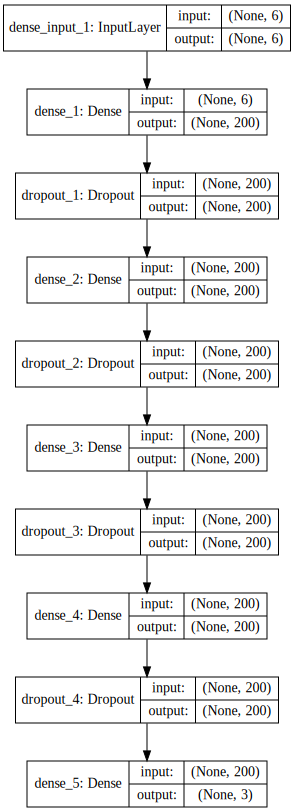

In [12]:
from IPython.display import Image, display, SVG
from keras.utils.visualize_util import model_to_dot

# Show the model in ipython notebook
figure = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
display(figure)

# Save the model as png file
from keras.utils.visualize_util import plot
plot(model, to_file='model.png', show_shapes=True)